In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import json
from pathlib import Path
from pprint import pprint
import numpy as np

import urltools

import matplotlib.pyplot as plt 
import seaborn as sns

try:  # for notebooks
    get_ipython
    from tqdm._tqdm_notebook import tqdm_notebook as tqdm
except:  # for commandline
    from tqdm import tqdm
tqdm.pandas()

In [11]:
queries = pd.read_csv("../../data/input/queries.csv", index_col="id")

In [66]:
import configparser
import json

headers = ['tweet_id', 'posted_on', 'user_id', 'retweeted_status',
           'quoted_status', 'in_reply_to', 'urls', 'is_truncated',
           'refetched', 'error']
# Load config
root = Path('../../')
Config = configparser.ConfigParser()
Config.read(str(root / 'config.cnf'))

output_dir = root / Config.get('output_files', 'tweets')

files = output_dir.glob("*.csv")

# Iterate over available newspapers
for infile in files:
    df = pd.read_csv(str(infile), index_col="tweet_id")
    df['urls'] = df['urls'].map(lambda x: json.dumps(eval(x)) if not pd.isna(x) else None)
    df.to_csv(str(infile).split(".csv")[0] + "_.csv", index=True)

In [27]:
json.dumps(["abc", "def"])

'["abc", "def"]'

In [ ]:
json.loads('["https://t.co/b3tbrueTpo", "http://buff.ly/2eVlT2u"]')

In [30]:
json.loads("['https://t.co/b3tbrueTpo', 'http://buff.ly/2eVlT2u']".replace("\"", "'"))

JSONDecodeError: Expecting value: line 1 column 2 (char 1)

In [18]:
queries

,query,venue_name,venue_short,relevant_terms,found_tweets
id,,,,,
1,bostonglobe AND science_extended,The Boston Globe,bostonglobe,science_extended,2287
2,bostonglobe AND science,The Boston Globe,bostonglobe,science,29963
3,chicago AND suntimes AND science,The Chicago Suntimes,chicago,science,2003
4,foxnews AND science,FOX News,foxnews,science,431310
5,guardian AND science,The Guardian,theguardian,science,130078
6,iflscience,IFLScience,iflscience,NaN,333099
7,latimes AND science,The LA Times,latimes,science,203134
8,nytimes AND science,The NY Times,nytimes,science,1783887
9,sfchronicle AND science,SF Chronicle,sfchronicle,science,15058


In [13]:
terms = queries.groupby("venue_short")['relevant_terms'].apply(lambda x: list(x))

In [16]:
terms

venue_short
bostonglobe                              [science_extended, science]
chicago                                                    [science]
foxnews                                                    [science]
iflscience                                                     [nan]
latimes                                                    [science]
nytimes                                                    [science]
sfchronicle                                                [science]
slate              [bad_astronomy, climate_desk, future_tense, he...
theglobeandmail                                            [science]
theguardian                                                [science]
washingtonpost     [animalia, energy-environment, speaking-of-sci...
wired                                                      [science]
Name: relevant_terms, dtype: object

In [10]:
pd.DataFrame.from_dict({"x":30, "y": 40}, orient="index", columns=["n"])

,n
y,40
x,30


In [35]:
from pathlib import Path

data_dir = Path("../../data/")
input_dir = data_dir / "twitter_dump/"
output_dir = data_dir / "tweets/"

files = input_dir.glob("*.csv")
for infile in files:
    r = queries.loc[queries['query'] == infile.name.split(".")[0], "found_tweets"].iloc[0]
    print(r)

220
2287
14
2081
2003
6850


In [5]:
queries

,query,venue_name,venue_short,relevant_terms,found_tweets
id,,,,,
1,bostonglobe AND science_extended,The Boston Globe,bostonglobe,science_extended,2287
2,bostonglobe AND science,The Boston Globe,bostonglobe,science,29963
3,chicago AND suntimes AND science,The Chicago Suntimes,chicago,science,2003
4,foxnews AND science,FOX News,foxnews,science,431310
5,guardian AND science,The Guardian,theguardian,science,130078
6,iflscience,IFLScience,iflscience,NaN,333099
7,latimes AND science,The LA Times,latimes,science,203134
8,nytimes AND science,The NY Times,nytimes,science,1783887
9,sfchronicle AND science,SF Chronicle,sfchronicle,science,15058


In [3]:
data_dir = Path("../../data/")
path_final = data_dir / "twitter_urls_cleaned"
path_altmetric = data_dir / "altmetric_urls"

files = listdir(str(path_final))[0:5]

FileNotFoundError: [Errno 2] No such file or directory: '../../data/twitter_urls_cleaned'

In [8]:
def clean_url(row):
    '''
    Strip out trailing slashes, URL query variables, anchors, etc.
    '''
    if pd.isna(row['url']):
        return np.nan
    
    url = row['url']
    venue = row['venue_short']
    url = "www." + venue + "".join(url.split(venue)[1:])
    
    try:
        up = urltools.extract(url)
        url = up.domain + "." + up.tld + up.path
        url = urltools.normalize(url)
        return url 
    except:
        raise
    
def relevant_url(url, venue):
    '''
    Strip out trailing slashes, URL query variables, anchors, etc.
    '''
    if pd.isna(url):
        return False
    
    for category in queries[venue]:
        if "/" + category + "/" in url:
            return True
    return False

def load_urls(file):
    urls = pd.read_csv(file,
                       na_values="None",
                       dtype={'tweet_id': str,
                              'retweet_id':str,
                              'relevant_url':str,
                              'clean_url': str})
    urls = urls.drop_duplicates()
    urls = urls.set_index("tweet_id")
    return urls

def merge_urls(row):
    a = row['relevant_url']
    b = row['retweet_url']
    if not pd.isna(a):
        return a
    
    return b

In [14]:
am_news_urls = pd.read_csv("../../data/output/altmetric_urls/altmetric_urls_relevant.csv", index_col="id", parse_dates=['posted_on'])

In [28]:
df = am_news_urls[am_news_urls.venue_short == "washingtonpost"][['posted_on', 'url']]
df.dropna(inplace=True)
df['url'] = df.url.map(lambda x: x[x.index('/', 10):])
df.sample(20)

,posted_on,url
id,,
212,2016-10-05 14:35:11,/news/speaking-of-science/wp/2016/10/05/bigger...
8916,2017-04-20 09:05:37,/news/how-to-help-alzheimers-patients-enjoy-li...
2221,2016-11-16 10:10:20,/news/as-non-medical-vaccine-exemptions-grow-t...
10254,2017-05-22 11:17:02,/news/morning-mix/wp/2017/05/22/donald-trump-a...
8004,2017-03-29 09:00:28,/blogs/wonkblog/wp/2017/03/29/where-noisy-road...
1283,2016-10-27 15:34:14,/news/the-fix/wp/2016/10/27/donald-trumps-risk...
7084,2017-03-07 18:24:02,/news/to-your-health/wp/2017/03/07/arthritis-a...
589,2016-10-13 11:25:04,/news/monkey-cage/wp/2016/10/13/were-getting-a...
7930,2017-03-27 18:54:20,/news/energy-environment/wp/2017/03/27/trump-w...


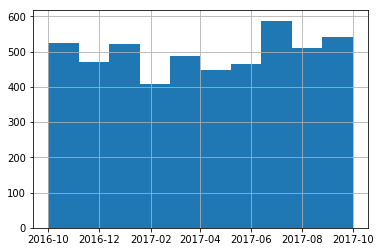

In [20]:
am_news_urls[am_news_urls.venue_short == "washingtonpost"].posted_on.hist()

In [34]:
am_news_urls['clean_url'] = am_news_urls.apply(clean_url, axis=1)

am_news_urls = am_news_urls.assign(relevant=np.nan)

for vals in tqdm(am_news_urls[['clean_url', 'venue_short']].itertuples(), total=len(am_news_urls)):
    am_news_urls.loc[vals[0], 'relevant'] = relevant_url(vals[1], vals[2])
    
# am_urls = am_news_urls[am_news_urls['clean_url'].notnull()].groupby("venue_short")['clean_url'].unique()
am_urls = am_news_urls[(am_news_urls['clean_url'].notnull()) & (am_news_urls.relevant.notnull()) & (am_news_urls.relevant == True)].groupby("venue_short")['clean_url'].unique()

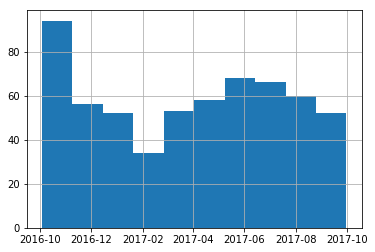

In [55]:
i = am_news_urls[(am_news_urls.venue_short == "washingtonpost") & (am_news_urls.relevant)].clean_url.drop_duplicates().index
am_news_urls.loc[i].posted_on.hist()

In [15]:
urls = {}
for file in tqdm(files):
    df = load_urls(path_final / file)
    
    v = file.split(" ")[0]
    df = df.assign(venue_short=v)
    
    df['url'] = df.apply(merge_urls, axis=1)
    df['clean_url'] = df.apply(clean_url, axis=1)
    
    for vals in df[['clean_url', 'venue_short']].itertuples():
        df.loc[vals[0], 'relevant'] = relevant_url(vals[1], vals[2])
    urls[v] = df

In [23]:
sorted(urls['chicago'].url.dropna().tolist())

['http://chicago.suntimes.com/chicago-politics/faster-bacteria-testing-solves-decades-old-dilemma-at-chicago-beaches/',
 'http://chicago.suntimes.com/columnists/march-for-science-threatens-to-undermine-faith-in-science/',
 'http://chicago.suntimes.com/columnists/steinberg-tiny-scientists-mobilized-to-study-solar-eclipse/',
 'http://chicago.suntimes.com/columnists/steinberg-tiny-scientists-mobilized-to-study-solar-eclipse/',
 'http://chicago.suntimes.com/columnists/steinberg-tiny-scientists-mobilized-to-study-solar-eclipse/',
 'http://chicago.suntimes.com/columnists/steinberg-tiny-scientists-mobilized-to-study-solar-eclipse/amp/',
 'http://chicago.suntimes.com/entertainment/can-breakfast-help-keep-us-thin-nutrition-science-is-tricky/',
 'http://chicago.suntimes.com/entertainment/can-breakfast-help-keep-us-thin-nutrition-science-is-tricky/',
 'http://chicago.suntimes.com/entertainment/can-breakfast-help-keep-us-thin-nutrition-science-is-tricky/',
 'http://chicago.suntimes.com/lifestyles/

In [1]:
am_news_urls = pd.read_csv(str(path_altmetric / "am_news_urls_relevant.csv"), index_col="id")

am_urls = am_news_urls[(am_news_urls['clean_url'].notnull()) & (
    am_news_urls.relevant == True)].groupby("venue_short")['clean_url'].unique()

NameError: name 'pd' is not defined

In [7]:
twitter_urls = {}
for v, df in tqdm(urls.items(), total=len(urls)):
    l = df[df.relevant].clean_urls.tolist()
    
    if v in twitter_urls:
        twitter_urls[v] = urls_dict[v].union(l)
    else:
        twitter_urls[v] = set(l)

AttributeError: 'DataFrame' object has no attribute 'clean_urls'

In [1]:
df = pd.DataFrame(columns=['Twitter', 'Altmetric', 'both'])

for short in urls_dict.keys():
    try:
        tw = len(urls_dict[short])
        am = len(am_urls[short])
        both = len(urls_dict[short].intersection(am_urls[short]))
        df.loc[short] = [tw, am, both]
    except:
        pass
df.to_csv("results.csv")

NameError: name 'pd' is not defined